<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/noah_poe_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('stargazer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(stargazer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [3]:
df_raw <- read_csv("cfb.csv")

New names:
• `` -> `...1`
Rows: 21163 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): name, position, school, committed_to, recruit_type, city, state_pro...
dbl (9): ...1, year, ranking, rating, stars, height, weight, id, athlete_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
df <- read_csv('cfb.csv') %>%
  filter(position %in% c("QB", "DUAL", "PRO", "WR", "CB", "OT", "ATH") & !is.na(height)) %>%
  mutate(position = case_when(
    position %in% c("QB", "DUAL", "PRO") ~ "QB",
    TRUE ~ position
  ))

New names:
• `` -> `...1`
Rows: 21163 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): name, position, school, committed_to, recruit_type, city, state_pro...
dbl (9): ...1, year, ranking, rating, stars, height, weight, id, athlete_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
df %>% count(position)

position,n
<chr>,<int>
ATH,1621
CB,1904
OT,1787
QB,1354
WR,2677


In [6]:
df %>% dim

[1] 9343   17

In [7]:
df %>% colnames

[1] "...1"           "year"           "name"           "position"      
 [5] "school"         "ranking"        "rating"         "stars"         
 [9] "committed_to"   "recruit_type"   "height"         "weight"        
[13] "city"           "state_province" "country"        "id"            
[17] "athlete_id"

In [8]:
cor(df$height, df$weight)

[1] NA

In [9]:
cor(df$height, df$rating)

[1] 0.1338074

In [10]:
cor(df$rating, df$weight)

[1] NA

In [11]:
df %>% head

...1,year,name,position,school,ranking,rating,stars,committed_to,recruit_type,height,weight,city,state_province,country,id,athlete_id
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0,2018,Trevor Lawrence,QB,Cartersville,1,0.9999,5,Clemson,HighSchool,78.00,208,Cartersville,GA,USA,42908,4360310
1,2018,Justin Fields,QB,Harrison,2,0.9998,5,Georgia,HighSchool,75.00,221,Kennesaw,GA,USA,42909,4362887
5,2018,Patrick Surtain II,CB,American Heritage,6,0.9973,5,Alabama,HighSchool,73.25,199,Fort Lauderdale,FL,USA,42913,4372012
6,2018,Nicholas Petit-Frere,OT,Berkeley Prep,7,0.9963,5,Ohio State,HighSchool,78.00,272,Tampa,FL,USA,42914,4361368
7,2018,Justin Shorter,WR,South Brunswick,8,0.9962,5,Penn State,HighSchool,76.00,213,Monmouth Junction,NJ,USA,42915,4361426
10,2018,Amon-Ra St. Brown,WR,Mater Dei,11,0.9948,5,USC,HighSchool,71.50,191,Anaheim,CA,USA,42918,4374302


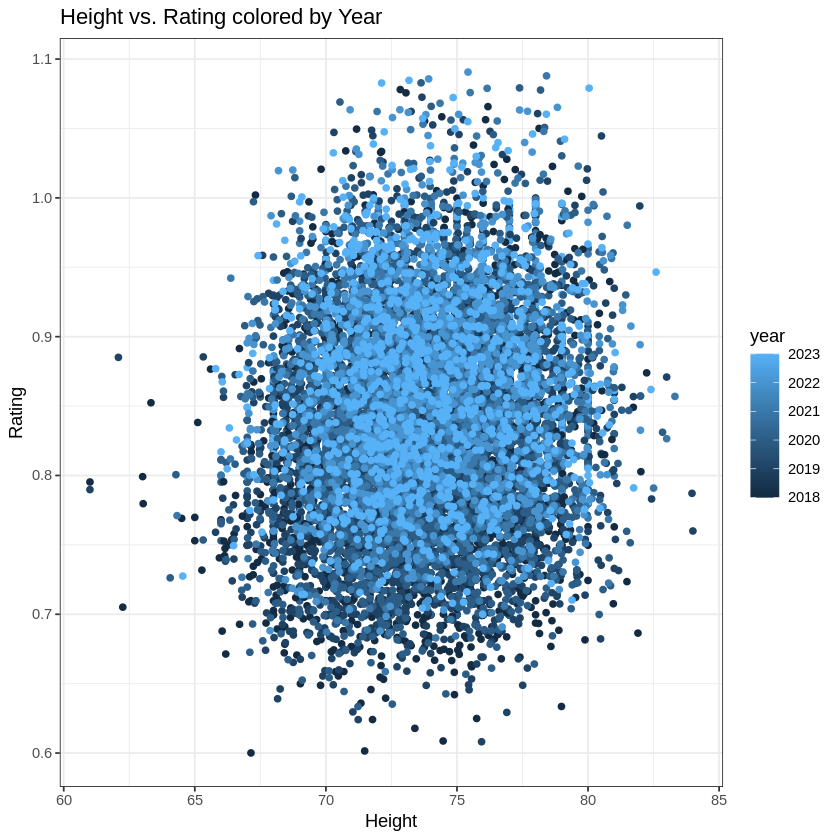

In [12]:
df %>% ggplot(aes(x=height, y=rating, color=year)) + geom_point() +
  labs(x="Height", y="Rating", title="Height vs. Rating colored by Year") +
    theme_bw() + geom_jitter(height = .1, width=2)

Warning message in geom_jitter(height = 0.2, widht = 3):
“Ignoring unknown parameters: `widht`”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


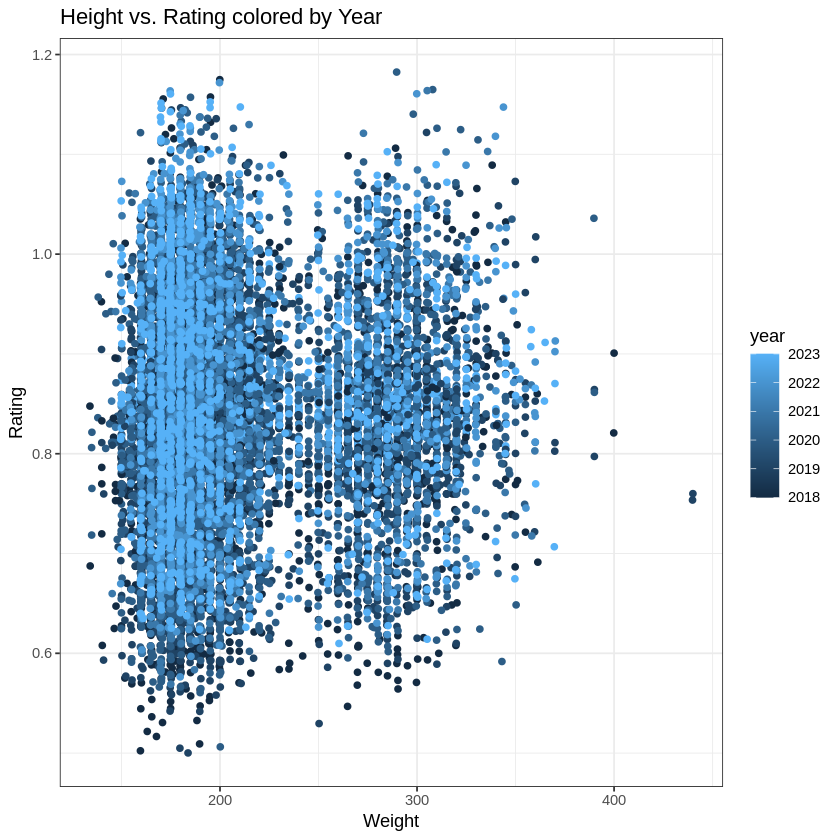

In [13]:
df %>% ggplot(aes(x=weight, y=rating, color=year)) + geom_point() +
  labs(x="Weight", y="Rating", title="Height vs. Rating colored by Year") +
    theme_bw() + geom_jitter(height = .2, widht=3)

Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


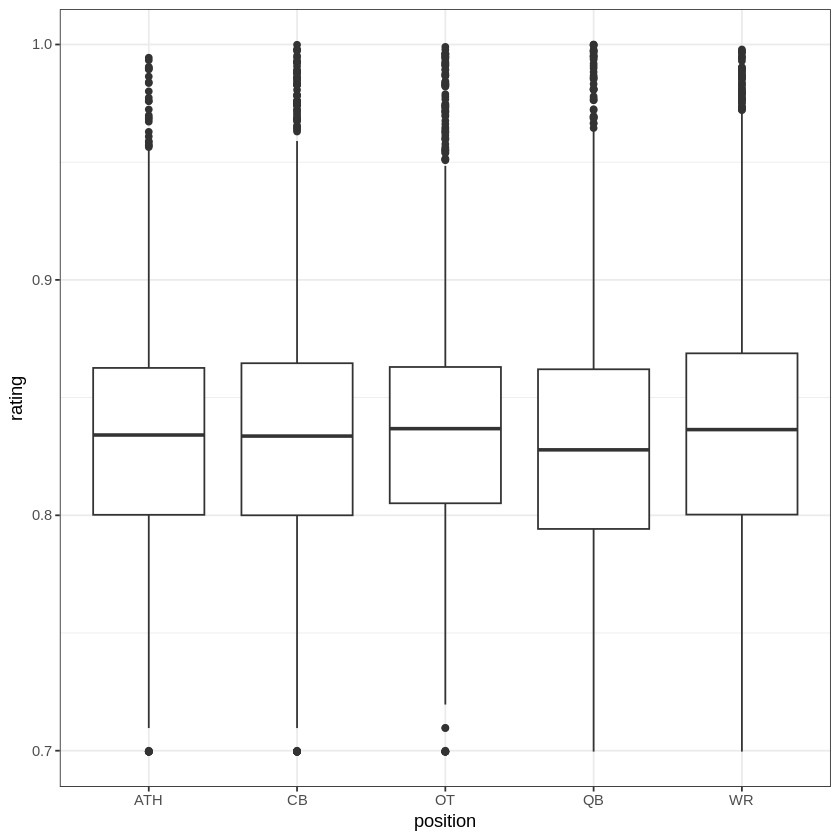

In [14]:
df %>% ggplot(aes(x=position, y=rating, color=year)) + geom_boxplot() + theme_bw()

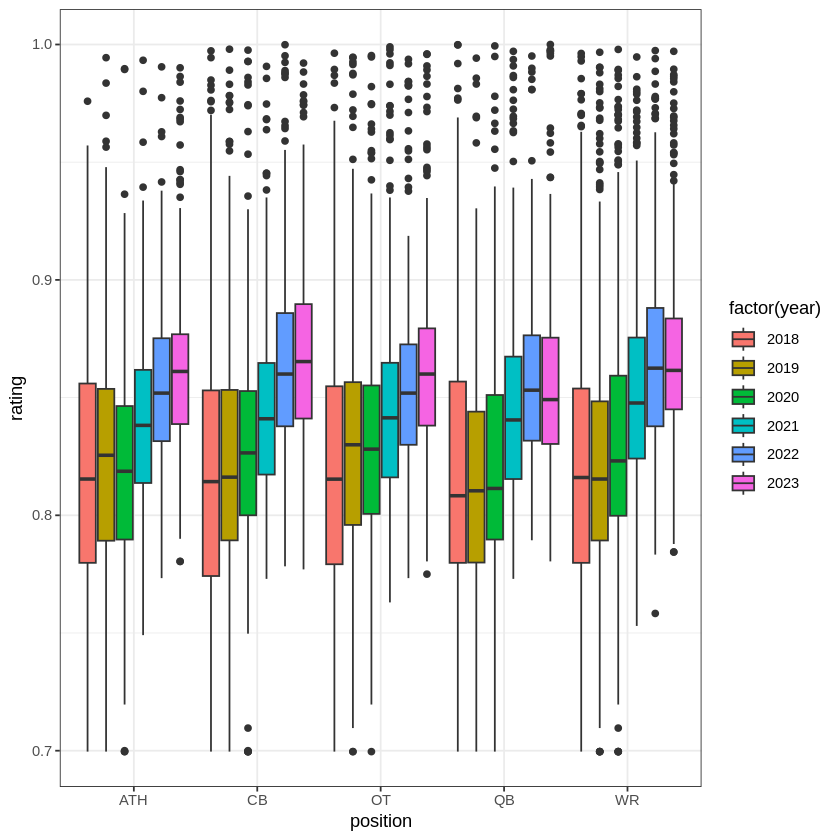

In [15]:
df %>%
  ggplot(aes(x = position, y = rating, fill = factor(year), group = interaction(position, year))) +
  geom_boxplot(position = position_dodge(width = 0.9), width = 0.8) +
  theme_bw()

$$
\begin{align}
\text{Model 1: }& \ \ \widehat{rating} = \beta_0 + \beta_1 height \\
\text{Model 2: }& \ \ \widehat{rating} = \beta_0 + \beta_1 height + \beta_2 weight \\
\text{Model 3: }& \ \ \widehat{rating} = \beta_0 + \beta_1 height + \beta_2 weight + \beta_3 year \\
\text{Model 4: }& \ \ \widehat{rating} = \beta_0 + \beta_1 height + \beta_2 weight + \beta_3 year + \beta_4 position \\
\text{Model 5: }& \ \ \widehat{rating} = \beta_0 + \beta_1 height*position + \beta_2 weight + \beta_3 year
\end{align}
$$

In [17]:
summary(df$rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6996  0.8000  0.8337  0.8358  0.8646  1.0000 

In [16]:
model1 <- lm(rating ~ height, data=df)
summary(model1)


Call:
lm(formula = rating ~ height, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146930 -0.034812 -0.001744  0.028356  0.172900 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.6530060  0.0140155   46.59   <2e-16 ***
height      0.0024811  0.0001901   13.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05129 on 9341 degrees of freedom
Multiple R-squared:  0.0179,	Adjusted R-squared:  0.0178 
F-statistic: 170.3 on 1 and 9341 DF,  p-value: < 2.2e-16


In [18]:
model2 <- lm(rating ~ height + weight, data=df)
summary(model2)


Call:
lm(formula = rating ~ height + weight, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14732 -0.03472 -0.00170  0.02831  0.17452 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.082e-01  1.906e-02  31.909  < 2e-16 ***
height       3.263e-03  2.954e-04  11.047  < 2e-16 ***
weight      -6.300e-05  1.831e-05  -3.441 0.000582 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05126 on 9338 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01921,	Adjusted R-squared:  0.019 
F-statistic: 91.43 on 2 and 9338 DF,  p-value: < 2.2e-16


In [20]:
model3 <- lm(rating ~ height + weight + year, data=df)
summary(model3)


Call:
lm(formula = rating ~ height + weight + year, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.145451 -0.032865 -0.005146  0.025506  0.185619 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.998e+01  6.212e-01 -32.163  < 2e-16 ***
height       2.894e-03  2.796e-04  10.347  < 2e-16 ***
weight      -5.045e-05  1.732e-05  -2.913  0.00359 ** 
year         1.020e-02  3.078e-04  33.157  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04848 on 9337 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1225,	Adjusted R-squared:  0.1222 
F-statistic: 434.6 on 3 and 9337 DF,  p-value: < 2.2e-16


In [29]:
model4 <- lm(rating ~ height + weight + year + position, data=df)
summary(model4)


Call:
lm(formula = rating ~ height + weight + year + position, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.154264 -0.032093 -0.004782  0.024654  0.184708 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.025e+01  6.121e-01 -33.080  < 2e-16 ***
height       3.019e-03  2.854e-04  10.578  < 2e-16 ***
weight       3.700e-04  3.170e-05  11.672  < 2e-16 ***
year         1.029e-02  3.032e-04  33.943  < 2e-16 ***
positionCB   1.283e-02  1.659e-03   7.734 1.15e-14 ***
positionOT  -4.631e-02  3.263e-03 -14.191  < 2e-16 ***
positionQB  -7.598e-03  1.806e-03  -4.207 2.61e-05 ***
positionWR   8.059e-03  1.523e-03   5.293 1.23e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0477 on 9333 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.151,	Adjusted R-squared:  0.1504 
F-statistic: 237.2 on 7 and 9333 DF,  p-value: < 2.2e-16


In [30]:
model5 <- lm(rating ~ height*position + weight + year , data=df)
summary(model5)


Call:
lm(formula = rating ~ height * position + weight + year, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16071 -0.03179 -0.00463  0.02460  0.18624 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.004e+01  6.116e-01 -32.769  < 2e-16 ***
height             8.274e-04  5.470e-04   1.513 0.130417    
positionCB        -3.529e-01  6.164e-02  -5.725 1.06e-08 ***
positionOT        -3.886e-01  7.944e-02  -4.891 1.02e-06 ***
positionQB        -2.449e-01  6.513e-02  -3.761 0.000170 ***
positionWR        -1.003e-01  4.741e-02  -2.116 0.034396 *  
weight             3.920e-04  3.185e-05  12.307  < 2e-16 ***
year               1.027e-02  3.028e-04  33.901  < 2e-16 ***
height:positionCB  5.078e-03  8.559e-04   5.933 3.09e-09 ***
height:positionOT  4.527e-03  1.039e-03   4.359 1.32e-05 ***
height:positionQB  3.244e-03  8.840e-04   3.670 0.000244 ***
height:positionWR  1.498e-03  6.523e-04   2.296 0.021672 *  
---
Signif. c

In [31]:
# Generate the summary table for models
stargazer(model1, model2, model3, model4, model5,
          type = "text",        # or "html" or "latex" depending on your output needs
          title = "Regression Results",
          align = TRUE,
          no.space = TRUE)


Regression Results
                                                                           Dependent variable:                                                       
                    ---------------------------------------------------------------------------------------------------------------------------------
                                                                                 rating                                                              
                               (1)                      (2)                       (3)                       (4)                       (5)            
-----------------------------------------------------------------------------------------------------------------------------------------------------
height                      0.002***                  0.003***                 0.003***                  0.003***                    0.001           
                            (0.0002)                  (0.0003)                 (